### IRIS FLOWER CLASSIFICATION
- The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.
- Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.
#### Dataset - https://www.kaggle.com/datasets/arshid/iris-flower-dataset/discussion/266718

### Steps
#### Preparing the environment
1. Import the necessary methods and modules
2. Read the required files
3. Checking for duplicate values - there are 3 duplicates in our dataset
    - We see 3 duplicated rows, but there is no need to remove them.
    - As the datset we are dealing with is the measure of specimens, it is common for specimens to have same features.
4. Checking for data imbalance - we see that the datset is perfectly balanced.
5. Train test split
#### Data Preprocessing
6. Checking for missing values - There are no missing values in our dataset.
7. Encoding the categorical variable to feed the model - using Label encoder
#### Exploratory Data Analysis
8. After using various plots to analyse the data, we can deduce the below
    - We see that the datapoints are distributed nearly normally acroos the dataset.
    - And the distribution with regards to the target column is also nearly perfect.
    - The target column has very high correlations with all the feature, except sepal width.
    - We can say that dispite the species sepal width will nealy be the same.
    - All the other features are interdependent on each other too much.
    - Which ever model we are building we will get very good accuracy scores.
#### Model Building and Furthur Preprocessing
9. Spliting X and Y (Dependent and Independednt variables).
10. Building various models on the raw dataset, we get the below accuracies for validation dataset
    - Logistic Regression using OVR technique - 0.9473684210526315
    - Logistic Regression using Multinomial technique - 0.9736842105263158
    - Decission Tree with Gini Impurity - 0.9736842105263158
    - Decission Tree with Information Gain - 0.9736842105263158
    - Bagging Classifier - 1.0
    - Random Forest CLassifier with Information Gain - 0.9736842105263158
    - Random Forest CLassifier with Gini Impurity - 0.9736842105263158
11. Concluding the below from the above scores
    - Wee se that the accuaracy score of the above models is nearly the same.
    - The accuracy score for different models is almost at the maximum.
    - Trying to increase the accuracy may increase the chances of overfiting problem.
    - Deciding to go with cross validation on Logistic Regression using Multinomial technique, Decission Tree with Gini Impurity and Random forest with information gain.
#### Cross Validating the top 3 models
12. After performing cross validation on th etop 3 models we come to the below conclusion
    - Test Mean Accuracy for Logistic Regression model using mulinomial technique 0.975
    - Test Mean Accuracy for Decission Tree using Gini Impurity method 0.975
    - Test Mean Accuracy for Random Forest model using Information Gain method 0.975
    - To reduce the complexity, deciding to go with Logistic Regression model.
#### Building the output files.
13. Building the output model.
14. We did not do any preprocessing on the training data except encoding, which is not required for output file.
15. Predicting for the complete dataset.
16. Building the output file in csv format.
17. Acheived an accuracy score of 0.9666666666666667 on the filal output considering the complete dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

sns.set()
%matplotlib inline

In [2]:
# Reading the datset into a dataframe

iris_df = pd.read_csv('03_IRIS.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Checking for duplicate values

iris_df.duplicated().sum()

3

In [4]:
iris_df[iris_df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


- We see 3 duplicated rows, but there is no need to remove them.
- As the datset we are dealing with is the measure of specimens, it is common for specimens to have same features.

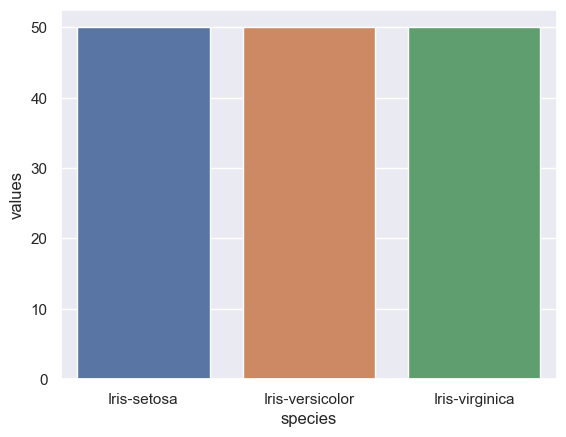

In [5]:
# Checking for data balance

temp = iris_df['species'].value_counts()    # Counts the number of ones and zeroes in the column
temp_df = pd.DataFrame({'species' : temp.index, 'values' : temp.values})    # Creating a data frame with value and their counts
sns.barplot(x = 'species', y = 'values', data = temp_df)
plt.show()

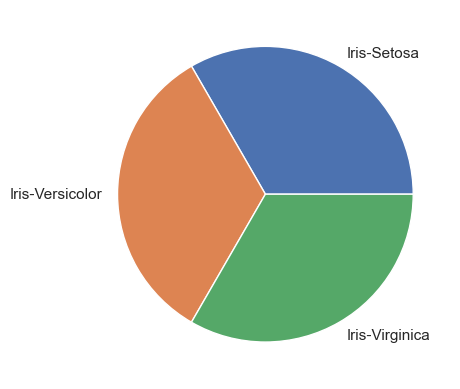

In [6]:
plt.pie(temp_df['values'], labels = ['Iris-Setosa', 'Iris-Versicolor','Iris-Virginica'])
plt.show()

In [7]:
# Since we have only one data set, spliting it into train and test (validation)

train_df, validation_df = train_test_split(iris_df, train_size = 0.75, random_state = 1, stratify = iris_df['species'])
train_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
137,6.4,3.1,5.5,1.8,Iris-virginica
21,5.1,3.7,1.5,0.4,Iris-setosa


In [8]:
validation_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
113,5.7,2.5,5.0,2.0,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa


#### Data Preprocessing

In [9]:
# Checking for missing values

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Checking for missing values in the training dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 137 to 64
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  112 non-null    float64
 1   sepal_width   112 non-null    float64
 2   petal_length  112 non-null    float64
 3   petal_width   112 non-null    float64
 4   species       112 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.2+ KB


In [12]:
train_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
# Checking for missing values in the training dataset

validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 113 to 102
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  38 non-null     float64
 1   sepal_width   38 non-null     float64
 2   petal_length  38 non-null     float64
 3   petal_width   38 non-null     float64
 4   species       38 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [14]:
validation_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

- There are no missing values in the dataset

In [15]:
# Encoding all the object datatype variables
# Using label encoder

encoder = LabelEncoder()
train_df['species'] = encoder.fit_transform(train_df['species'])
validation_df['species'] = encoder.fit_transform(validation_df['species'])

In [16]:
train_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
137,6.4,3.1,5.5,1.8,2
21,5.1,3.7,1.5,0.4,0
133,6.3,2.8,5.1,1.5,2
135,7.7,3.0,6.1,2.3,2
74,6.4,2.9,4.3,1.3,1


In [17]:
validation_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
113,5.7,2.5,5.0,2.0,2
7,5.0,3.4,1.5,0.2,0


In [18]:
train_df.shape

(112, 5)

In [19]:
validation_df.shape

(38, 5)


- Now there are no variables of object datatype

#### Exploratory Data Analysis

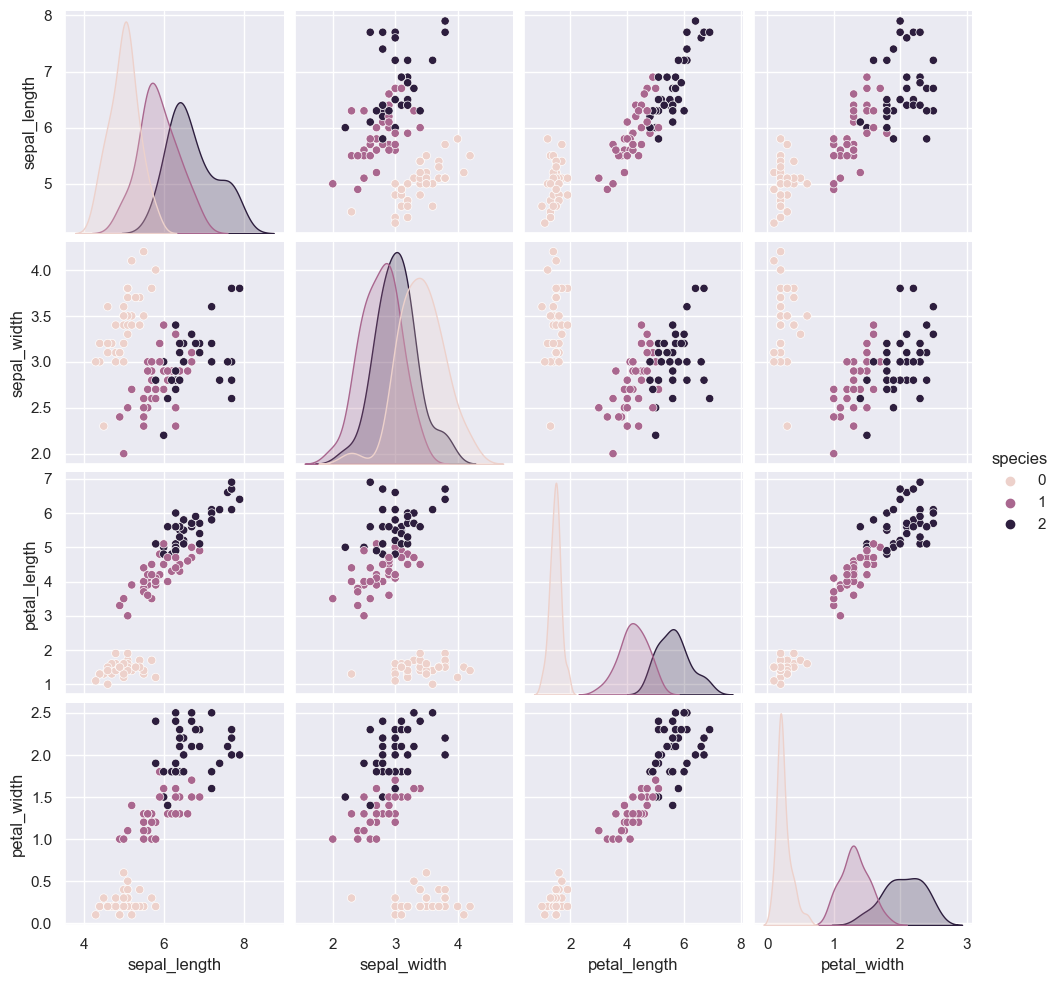

In [20]:
# Checking the pairplot

sns.pairplot(train_df, hue="species")
plt.show()

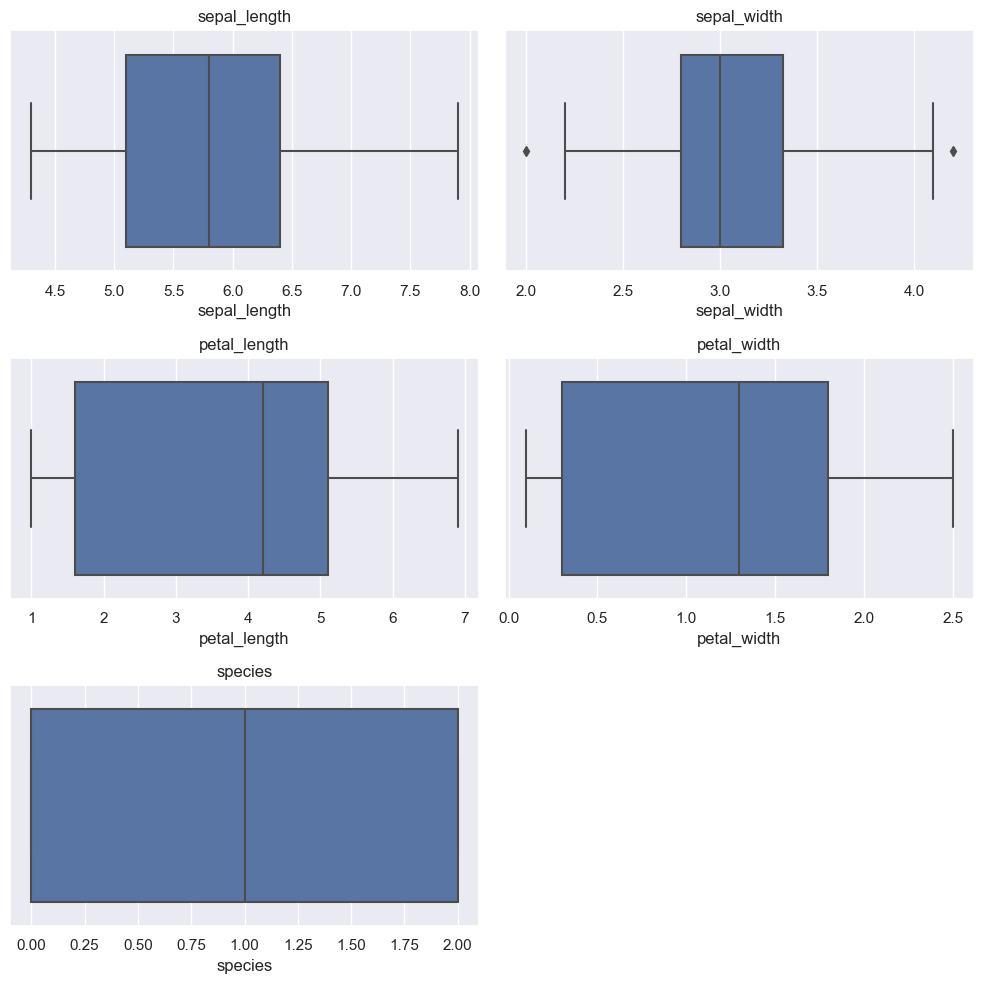

In [21]:
# Using box plot to see the distribution of each feature

plt.figure(figsize=(10, 10))

for col in train_df.select_dtypes(include = ['number']).columns:
    plt.subplot(3, 2, train_df.columns.get_loc(col) + 1)  # Adjust the subplot layout as needed
    sns.boxplot(x=train_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

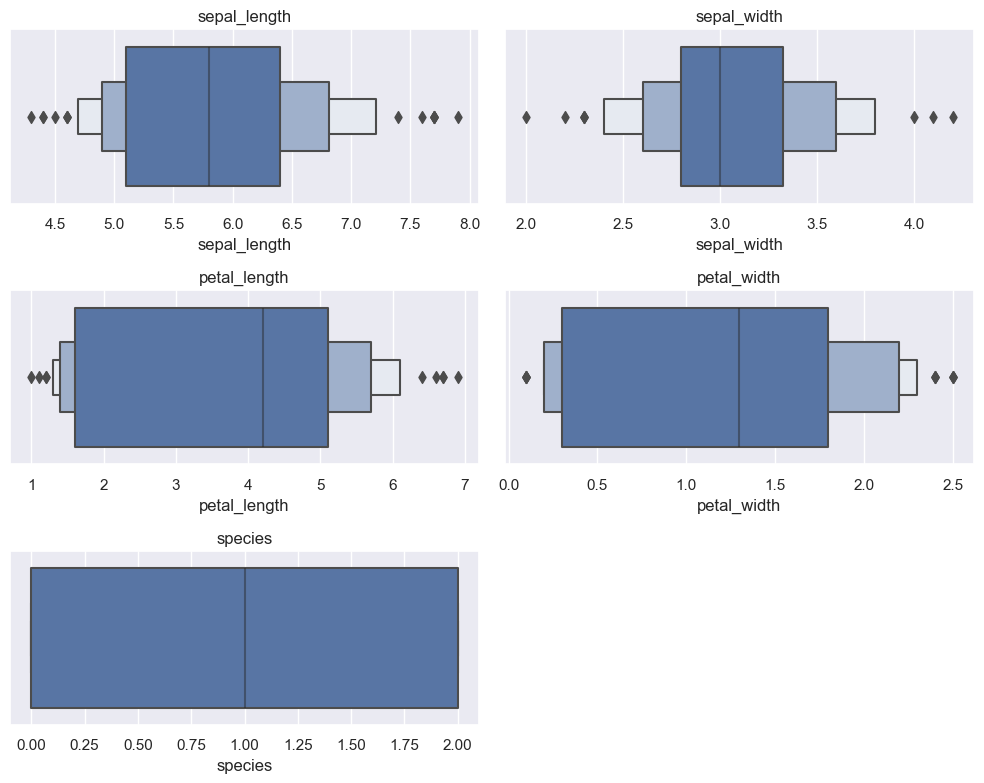

In [22]:
# Using boxen plots

plt.figure(figsize=(10, 8))

for col in train_df.select_dtypes(include = ['number']).columns:
    plt.subplot(3, 2, train_df.columns.get_loc(col) + 1)  # Adjust the subplot layout as needed
    sns.boxenplot(x=train_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

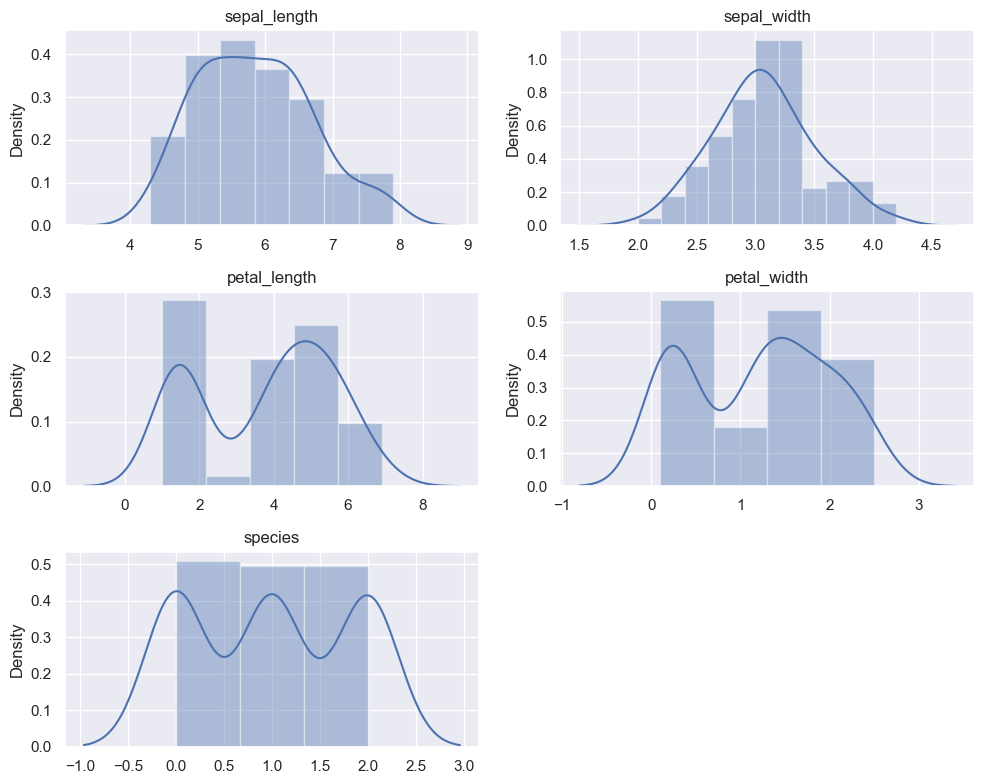

In [23]:
# Using distplots

plt.figure(figsize=(10, 8))

for col in train_df.select_dtypes(include = ['number']).columns:
    plt.subplot(3, 2, train_df.columns.get_loc(col) + 1)  # Adjust the subplot layout as needed
    sns.distplot(x=train_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

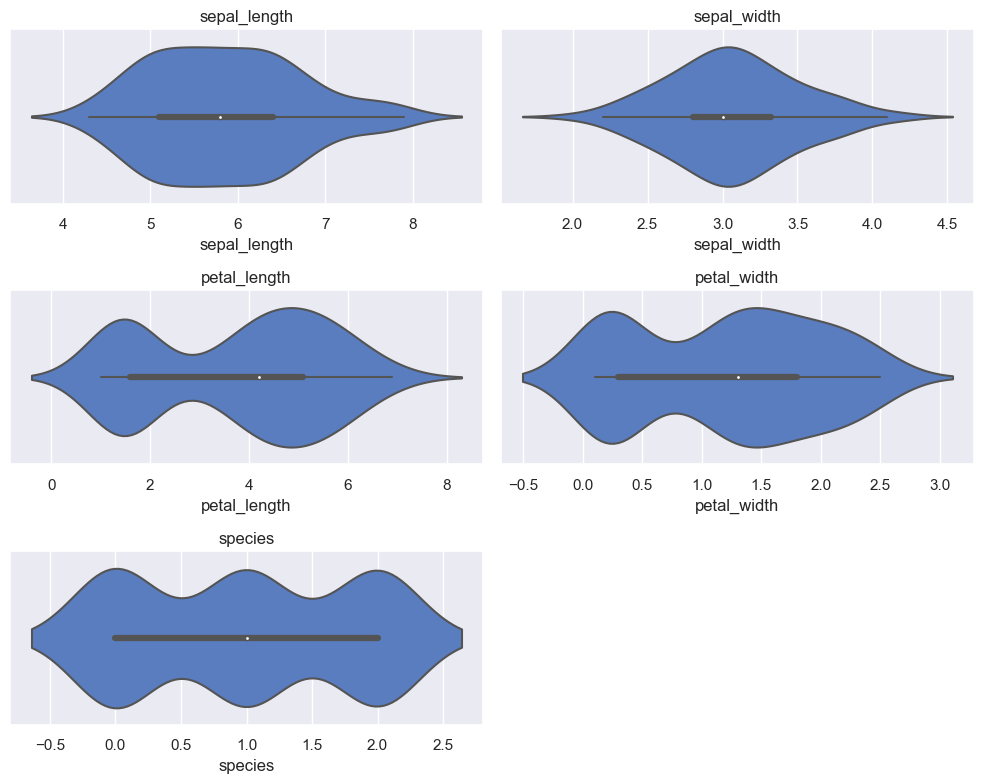

In [24]:
# Using violin plots to see a deper look into the distribution

plt.figure(figsize=(10, 8))

for col in train_df.select_dtypes(include = ['number']).columns:
    plt.subplot(3, 2, train_df.columns.get_loc(col) + 1)  # Adjust the subplot layout as needed
    sns.violinplot(x=train_df[col], palette = 'muted')
    plt.title(col)

plt.tight_layout()
plt.show()

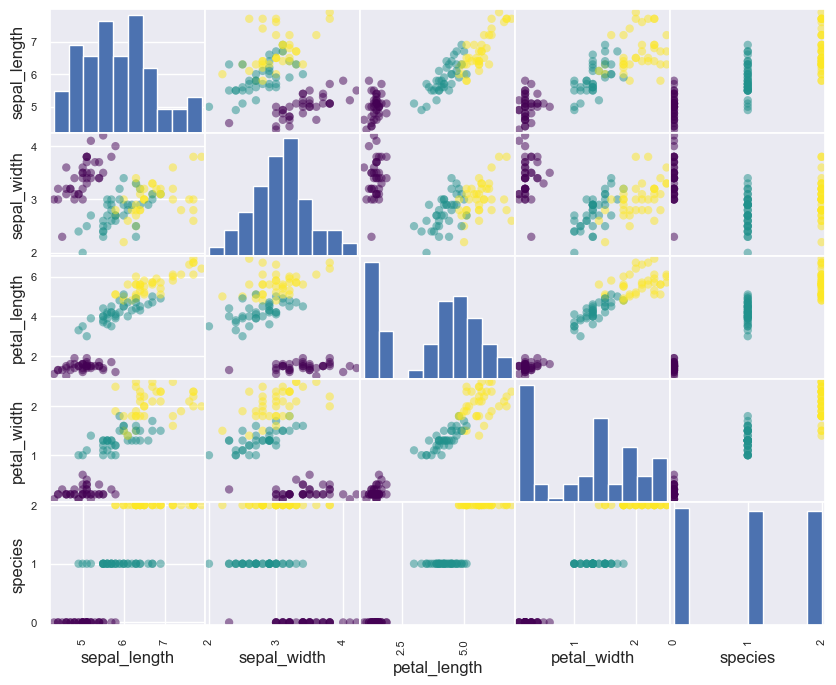

In [25]:
# Using scater-matrix plot

scatter_matrix(train_df, diagonal = "hist", marker = "o", c = train_df['species'], cmap = 'viridis', figsize = (10,8))
plt.show()

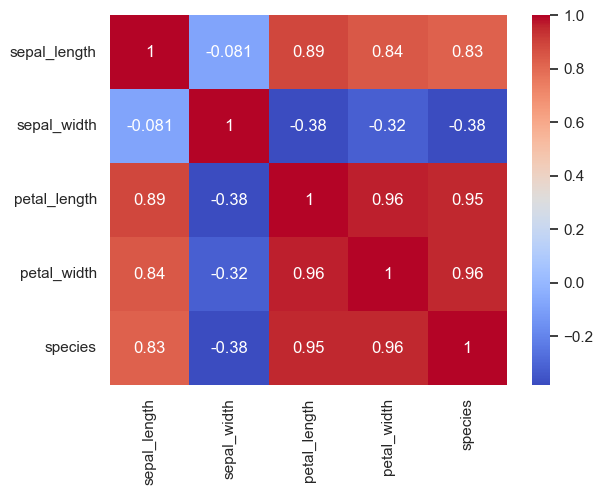

In [26]:
# Using heatmap to see the relationships

sns.heatmap(train_df.corr(), annot = True, cmap = "coolwarm")
plt.show()

##### Deductions
- We see that the datapoints are distributed nearly normally acroos the dataset.
- And the distribution with regards to the target column is also nearly perfect.
- The target column has very high correlations with all the feature, except sepal width.
- We can say that dispite the species sepal width will nealy be the same.
- All the other features are interdependent on each other too much.
- Which ever model we are building we will get very good accuracy scores.

#### Building Models and Furthur Data preprocessing

In [27]:
# Splitting dependent and independent variable

raw_x_train = train_df.drop(['species'], axis = 1)
raw_y_train = train_df['species']

raw_x_val = validation_df.drop(['species'], axis = 1)
raw_y_val = validation_df['species']

raw_x_train.head(2)

,sepal_length,sepal_width,petal_length,petal_width
137,6.4,3.1,5.5,1.8
21,5.1,3.7,1.5,0.4


In [28]:
# Building various classification models on the raw data

# Logistic Regression model with One-vs-Rest technique
logit_ovr = LogisticRegression(multi_class = 'ovr')
logit_ovr.fit(raw_x_train, raw_y_train)
lr_ovr_y_pred_train = logit_ovr.predict(raw_x_train)
lr_ovr_y_pred_val = logit_ovr.predict(raw_x_val)

print("Accuracy Score on raw data(Logistic Regression - OVR Technique)")
logit_ovr_score = accuracy_score(raw_y_val, lr_ovr_y_pred_val)
print(accuracy_score(raw_y_train, lr_ovr_y_pred_train))
print("**************")
print(logit_ovr_score)
print("**************"*7)

# Logistic Regression model with Multinomial technique
logit_multi = LogisticRegression(multi_class = 'multinomial')
logit_multi.fit(raw_x_train, raw_y_train)
lr_multi_y_pred_train = logit_multi.predict(raw_x_train)
lr_multi_y_pred_val = logit_multi.predict(raw_x_val)

print("Accuracy Score on raw data(Logistic Regression - Multinomial Technique)")
logit_multi_score = accuracy_score(raw_y_val, lr_multi_y_pred_val)
print(accuracy_score(raw_y_train, lr_multi_y_pred_train))
print("**************")
print(logit_multi_score)
print("**************"*7)

# Decission Tree classifier with Gini Impurity
dtree_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 6)
dtree_gini.fit(raw_x_train, raw_y_train)
dtg_y_pred_train = dtree_gini.predict(raw_x_train)
dtg_y_pred_val = dtree_gini.predict(raw_x_val)

print("Accuracy Score on raw data(Decission Tree (Gini Impurity))")
dtree_gini_score = accuracy_score(raw_y_val, dtg_y_pred_val)
print(accuracy_score(raw_y_train, dtg_y_pred_train))
print("**************")
print(dtree_gini_score)
print("**************"*7)

# Decission Tree classifier with Information Gain
dtree_gain = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
dtree_gain.fit(raw_x_train, raw_y_train)
dtga_y_pred_train = dtree_gain.predict(raw_x_train)
dtga_y_pred_val = dtree_gain.predict(raw_x_val)

print("Accuracy Score on raw data(Decission Tree (Information Gain))")
dtree_gain_score = accuracy_score(raw_y_val, dtga_y_pred_val)
print(accuracy_score(raw_y_train, dtga_y_pred_train))
print("**************")
print(dtree_gini_score)
print("**************"*7)

# Bagging Classifier 
bagging = BaggingClassifier(max_samples = 5, max_features = 3)
bagging.fit(raw_x_train, raw_y_train)
bag_y_pred_train = bagging.predict(raw_x_train)
bag_y_pred_val = bagging.predict(raw_x_val)

print("Accuracy Score on raw data(Bagging CLassifier)")
bag_score = accuracy_score(raw_y_val, bag_y_pred_val)
print(accuracy_score(raw_y_train, bag_y_pred_train))
print("**************")
print(bag_score)
print("**************"*7)

# Building the Random Forest Model with Information Gain
rf_gain = RandomForestClassifier(criterion = 'entropy', max_depth = 3, max_features = 2, n_estimators = 600, oob_score = True)
rf_gain.fit(raw_x_train, raw_y_train)
rfga_y_pred_train = rf_gain.predict(raw_x_train)
rfga_y_pred_val = rf_gain.predict(raw_x_val)

# Evaluating the model
print("Accuracy Score on raw data(Random Forest CLassifier (Information Gain))")
rf_gain_score = accuracy_score(raw_y_val, rfga_y_pred_val)
print(accuracy_score(raw_y_train, rfga_y_pred_train))
print("**************")
print(rf_gain_score)
print("**************"*7)

# Building the Random Forest Model with Gini Impurity
rf_gini = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 2, n_estimators = 600, oob_score = True)
rf_gini.fit(raw_x_train, raw_y_train)
rfg_y_pred_train = rf_gini.predict(raw_x_train)
rfg_y_pred_val = rf_gini.predict(raw_x_val)

# Evaluating the model
print("Accuracy Score (Random Forest CLassifier on raw data(Gini Impurity))")
rf_gini_score = accuracy_score(raw_y_val, rfg_y_pred_val)
print(accuracy_score(raw_y_train, rfg_y_pred_train))
print("**************")
print(rf_gini_score)
print("**************"*7)

Accuracy Score on raw data(Logistic Regression - OVR Technique)
0.9464285714285714
**************
0.9473684210526315
**************************************************************************************************
Accuracy Score on raw data(Logistic Regression - Multinomial Technique)
0.9642857142857143
**************
0.9736842105263158
**************************************************************************************************
Accuracy Score on raw data(Decission Tree (Gini Impurity))
1.0
**************
0.9736842105263158
**************************************************************************************************
Accuracy Score on raw data(Decission Tree (Information Gain))
0.9821428571428571
**************
0.9736842105263158
**************************************************************************************************
Accuracy Score on raw data(Bagging CLassifier)
0.8928571428571429
**************
0.7894736842105263
**************************************************

- Wee se that the accuaracy score of the above models is nearly the same.
- The accuracy score for different models is almost at the maximum.
- Trying to increase the accuracy may increase the chances of overfiting problem.
- To reduce the complexity deciding to go with Logistic Regression using Multinomial technique.

#### Cross Validation of the top 3 models

In [29]:
# Cross validation on Logisctic Regression with multinomial technique

train_acc_lrm = cross_val_score(logit_multi, raw_x_train, raw_y_train, cv = 10)
test_acc_lrm = cross_val_score(logit_multi, raw_x_val, raw_y_val, cv = 10)

print("Cross Validation of Logistic Resression Model using multinomial technique")
print("Train Mean Accuracy", train_acc_lrm.mean())
print("**************")
print("Train Max Accuracy", train_acc_lrm.max())
print("**************"*7)
print("Test Mean Accuracy", test_acc_lrm.mean())
print("**************")
print("Test Max Accuracy", test_acc_lrm.max())
print("**************"*7)

Cross Validation of Logistic Resression Model using multinomial technique
Train Mean Accuracy 0.9553030303030303
**************
Train Max Accuracy 1.0
**************************************************************************************************
Test Mean Accuracy 0.975
**************
Test Max Accuracy 1.0
**************************************************************************************************


In [30]:
# Cross validation on Decission Tree with Gini Impurity

train_acc_dtg = cross_val_score(dtree_gini, raw_x_train, raw_y_train, cv = 10)
test_acc_dtg = cross_val_score(dtree_gini, raw_x_val, raw_y_val, cv = 10)

print("Cross Validation of Decission Tree Model using gini impurity")
print("Train Mean Accuracy", train_acc_dtg.mean())
print("**************")
print("Train Max Accuracy", train_acc_dtg.max())
print("**************"*7)
print("Test Mean Accuracy", test_acc_dtg.mean())
print("**************")
print("Test Max Accuracy", test_acc_dtg.max())
print("**************"*7)

Cross Validation of Decission Tree Model using gini impurity
Train Mean Accuracy 0.9378787878787879
**************
Train Max Accuracy 1.0
**************************************************************************************************
Test Mean Accuracy 0.975
**************
Test Max Accuracy 1.0
**************************************************************************************************


In [31]:
# Cross validation on Random Forest with Information Gain

train_acc_rfgain = cross_val_score(rf_gain, raw_x_train, raw_y_train, cv = 10)
test_acc_rfgain = cross_val_score(rf_gain, raw_x_val, raw_y_val, cv = 10)

print("Cross Validation of Random Forest Model using information gain")
print("Train Mean Accuracy", train_acc_rfgain.mean())
print("**************")
print("Train Max Accuracy", train_acc_rfgain.max())
print("**************"*7)
print("Test Mean Accuracy", test_acc_rfgain.mean())
print("**************")
print("Test Max Accuracy", test_acc_rfgain.max())
print("**************"*7)

Cross Validation of Random Forest Model using information gain
Train Mean Accuracy 0.9636363636363636
**************
Train Max Accuracy 1.0
**************************************************************************************************
Test Mean Accuracy 0.975
**************
Test Max Accuracy 1.0
**************************************************************************************************


- Test Mean Accuracy for Logistic Regression model using mulinomial technique 0.975
- Test Mean Accuracy for Decission Tree using Gini Impurity method 0.975
- Test Mean Accuracy for Random Forest model using Information Gain method 0.975
- To reduce the complexity, deciding to go with Logistic Regression model.

#### Building the output files

In [32]:
# Saving model for deployment

model = logit_multi
filename = 'Iris_Prediction.sav'
pickle.dump(model, open(filename, 'wb'))

In [33]:
# No preprocessing needed
# Spliting dependent and independent variable

features_df = iris_df.drop(['species'], axis = 1)
target_df = iris_df['species']

In [34]:
# Running the selected model on our final data frame

final_result = pd.DataFrame(logit_multi.predict(features_df))
final_result = final_result.rename(columns = {0 : "Species Predicted"})
final_result

,Species Predicted
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [35]:
# 0 - 21 - Setosa
# 1 - 74 - versicolor
# 2 - 135- - Virginica

decode_maping = {0 : 'Iris-setosa', 1 : 'Iris-versicolor', 2 : 'Iris-virginica'}
final_result['Species_Predicted'] = final_result['Species Predicted'].map(decode_maping)

In [36]:
final_result

,Species Predicted,Species_Predicted
0,0,Iris-setosa
1,0,Iris-setosa
2,0,Iris-setosa
3,0,Iris-setosa
4,0,Iris-setosa
...,...,...
145,2,Iris-virginica
146,2,Iris-virginica
147,2,Iris-virginica
148,2,Iris-virginica


In [37]:
out_df = pd.concat([iris_df, final_result['Species_Predicted']], axis = 1)
out_df

,sepal_length,sepal_width,petal_length,petal_width,species,Species_Predicted
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica


In [38]:
out_df.to_csv("03_Iris_Predictions.csv")

In [39]:
print("Final Accuracy Score")
print(accuracy_score(out_df['species'].astype('category').cat.codes, out_df['Species_Predicted'].astype('category').cat.codes))

Final Accuracy Score
0.9666666666666667
